In [1]:
#Importing required Libraries
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
import random

In [2]:
#Defining Data Directory and Categories 
DATADIR = "C:/EvolvFit/Dataset/Images"
CATEGORIES = ["Bhuvneshwar_Kumar", "Dinesh_Karthik", "Hardik_Pandya", "Jasprit_Bumrah", "K._L._Rahul", "Kedar_Jadhav", "Kuldeep_Yadav", "Mohammed_Shami", "MS_Dhoni", "Ravindra_Jadeja", "Rohit_Sharma", "Shikhar_Dhawan", "Vijay_Shankar", "Virat_Kohli", "Yuzvendra_Chahal"]

In [3]:
#Normalising Data - Setting Images to be 100x100
IMG_SIZE = 200

In [7]:
#Creating Dataset - Mapping Category to respective Image Folder
training_data = []
def create_training_data():
    for category in CATEGORIES:
        path = os.path.join(DATADIR, category)
        class_num = CATEGORIES.index(category)/15
        for img in os.listdir(path):
            try: 
                img_array = cv2.imread(os.path.join(path,img), cv2.IMREAD_GRAYSCALE)
                new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
                training_data.append([new_array, class_num])
            except Exception as e:
                pass           
create_training_data()

In [8]:
#Shuffling Data 
random.shuffle(training_data)

In [9]:
#Packing the data into variables before feeding through Neural Network
X = []
y = []

for features, label in training_data:
    X.append(features)
    y.append(label)

X = np.array(X).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
y = np.array(y)

In [10]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D

In [11]:
#Scaling Imagery Data
X = X/255.0

In [12]:
#Building The Model
model = Sequential()

In [13]:
#Adding Layers to the Model
model.add(Conv2D(128, (3,3), input_shape = X.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(128, (3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(128, (3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())

In [14]:
#Activation Layer
model.add(Dense(1))
model.add(Activation('sigmoid'))

In [15]:
#Compiling Model
model.compile(optimizer='sgd',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
             metrics=['accuracy'])

In [16]:
#Fitting the data into the model
history = model.fit(X, y, batch_size=32, epochs=10, validation_split=0.2)

Epoch 1/10
15/15 [==============================] - 47s 3s/step - loss: 0.0000e+00 - accuracy: 0.0500 - val_loss: 0.0000e+00 - val_accuracy: 0.0172
Epoch 2/10
15/15 [==============================] - 50s 3s/step - loss: 0.0000e+00 - accuracy: 0.0500 - val_loss: 0.0000e+00 - val_accuracy: 0.0172
Epoch 3/10
15/15 [==============================] - 49s 3s/step - loss: 0.0000e+00 - accuracy: 0.0500 - val_loss: 0.0000e+00 - val_accuracy: 0.0172
Epoch 4/10
15/15 [==============================] - 51s 3s/step - loss: 0.0000e+00 - accuracy: 0.0500 - val_loss: 0.0000e+00 - val_accuracy: 0.0172
Epoch 5/10
15/15 [==============================] - 52s 3s/step - loss: 0.0000e+00 - accuracy: 0.0500 - val_loss: 0.0000e+00 - val_accuracy: 0.0172
Epoch 6/10
15/15 [==============================] - 55s 4s/step - loss: 0.0000e+00 - accuracy: 0.0500 - val_loss: 0.0000e+00 - val_accuracy: 0.0172
Epoch 7/10
15/15 [==============================] - 56s 4s/step - loss: 0.0000e+00 - accuracy: 0.0500 - val_loss

In [17]:
# evaluate model
_, acc = model.evaluate(X, y, verbose=0)

NameError: name 'sys' is not defined

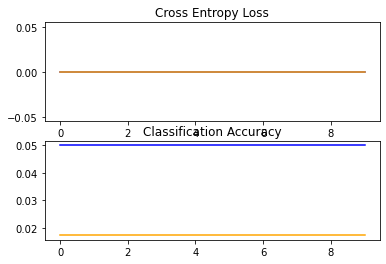

In [18]:
# plot diagnostic learning curves
def summarize_diagnostics(history):
	# plot loss
	plt.subplot(211)
	plt.title('Cross Entropy Loss')
	plt.plot(history.history['loss'], color='blue', label='train')
	plt.plot(history.history['val_loss'], color='orange', label='test')
	# plot accuracy
	plt.subplot(212)
	plt.title('Classification Accuracy')
	plt.plot(history.history['accuracy'], color='blue', label='train')
	plt.plot(history.history['val_accuracy'], color='orange', label='test')
	# save plot to file
	filename = sys.argv[0].split('/')[-1]
	plt.savefig(filename + '_plot.png')
	plt.close()
summarize_diagnostics(history)

In [19]:
print('> %.3f' % (acc * 100.0))

> 4.340
